# Early Stage Diabetes Risk Prediction - EDA and Model Building 

BY: Sehaj Malhotra

Linkedin: https://www.linkedin.com/in/sehajmalhotra/


Github: https://github.com/sehaj003


Kaggle: https://www.kaggle.com/sehaj2001

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn. preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
!pip install xgboost

In [29]:
from sklearn.metrics import r2_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

In [5]:
data = pd.read_csv('diabetes_data_upload.csv')

In [6]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [8]:
data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [9]:
cat = data.columns[1:]
numerical = data.columns[0]

In [10]:
cat

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [11]:
numerical

'Age'

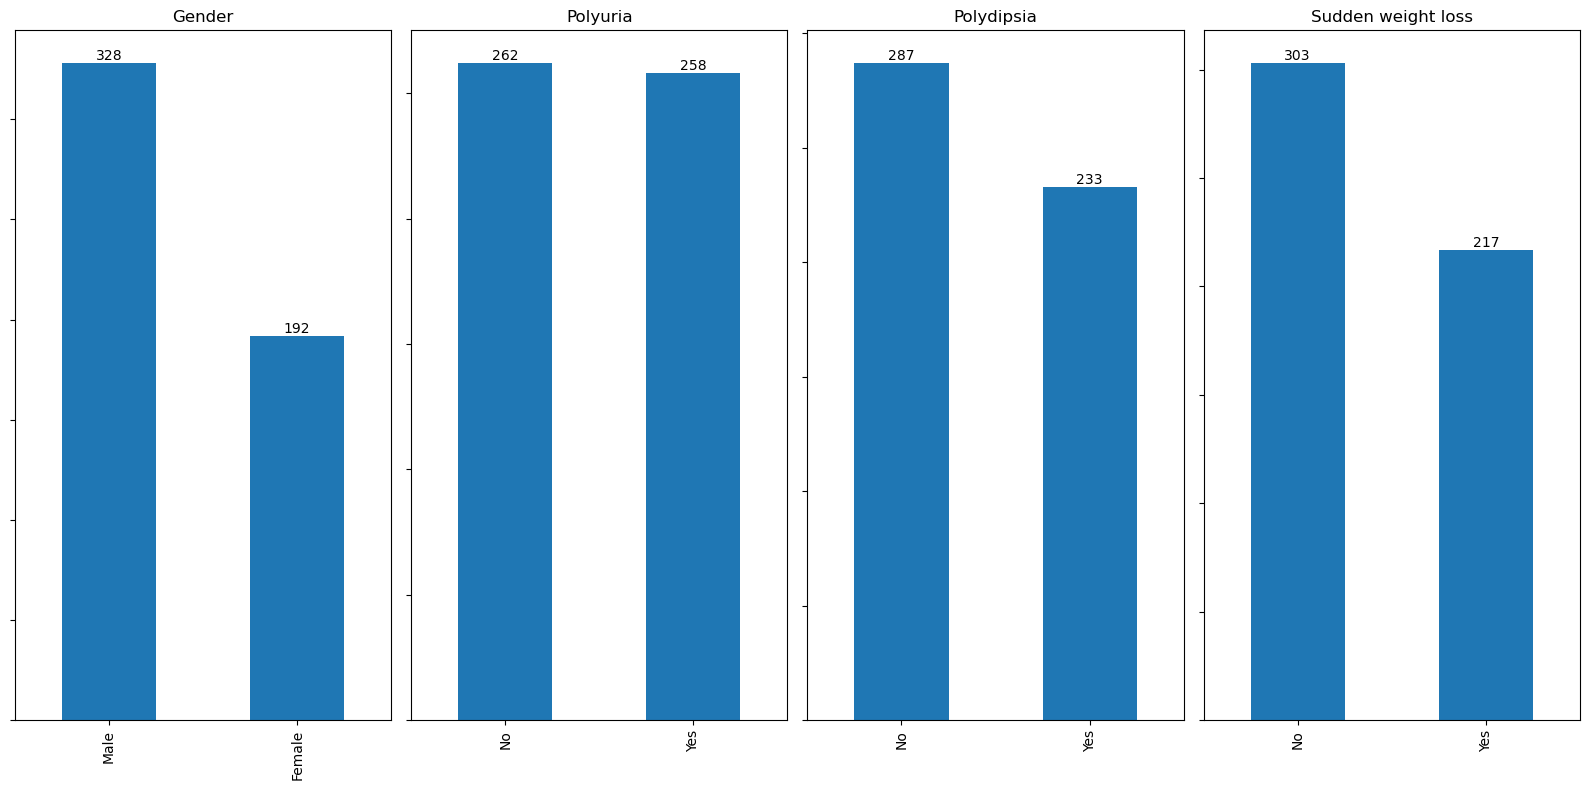

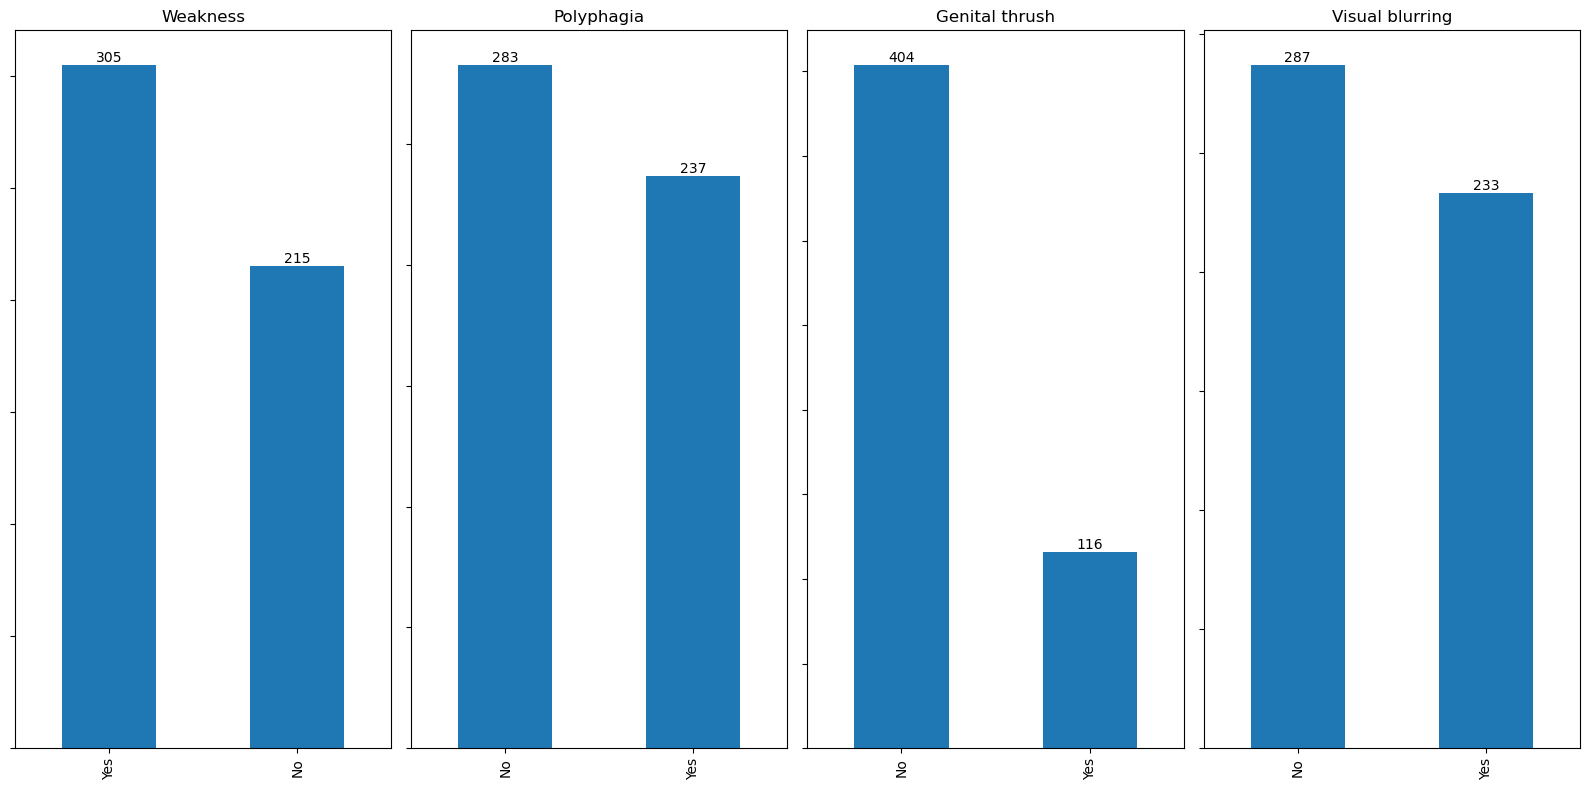

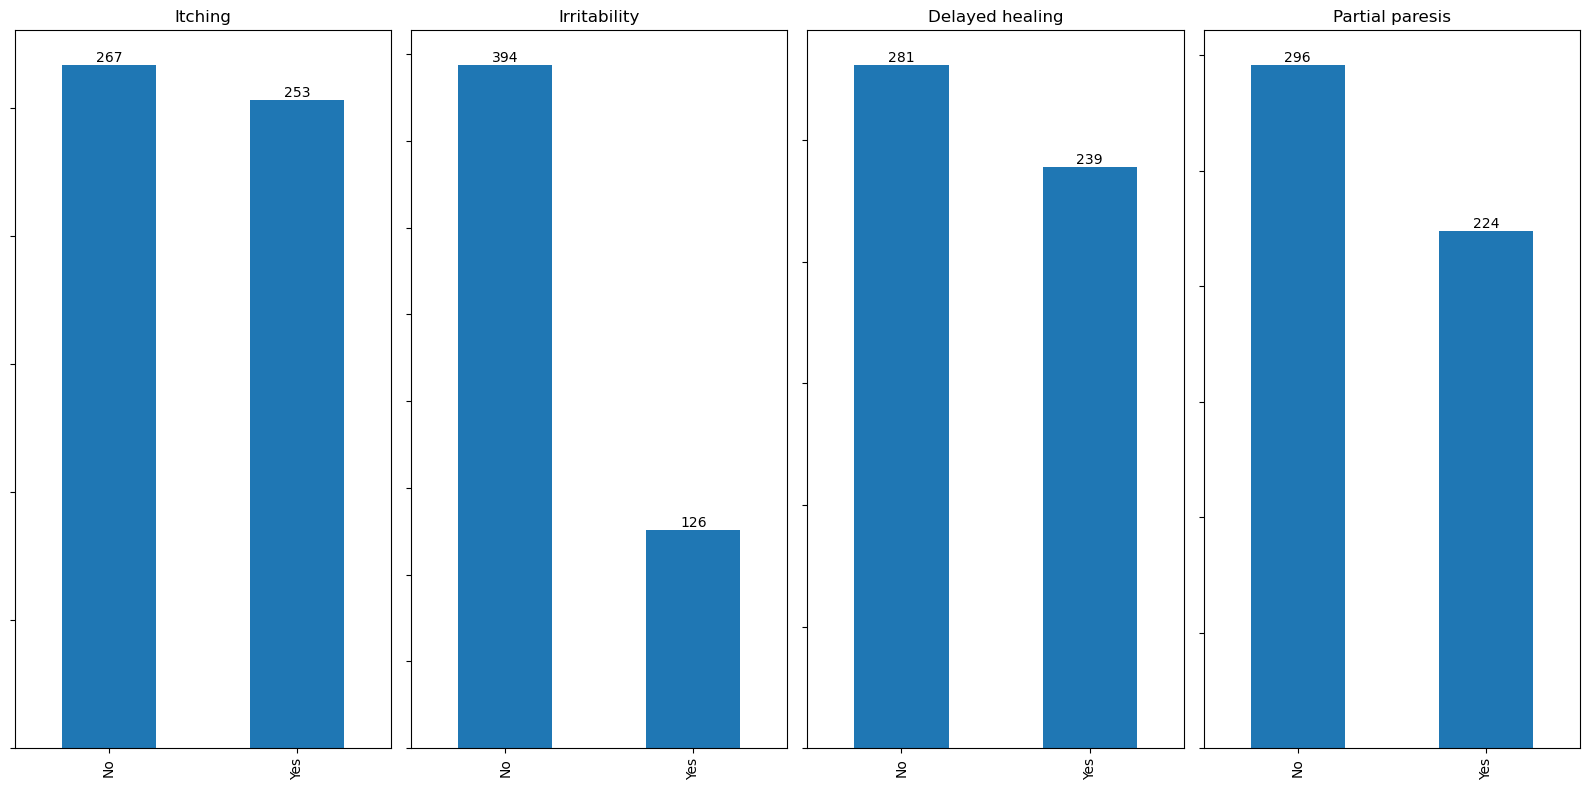

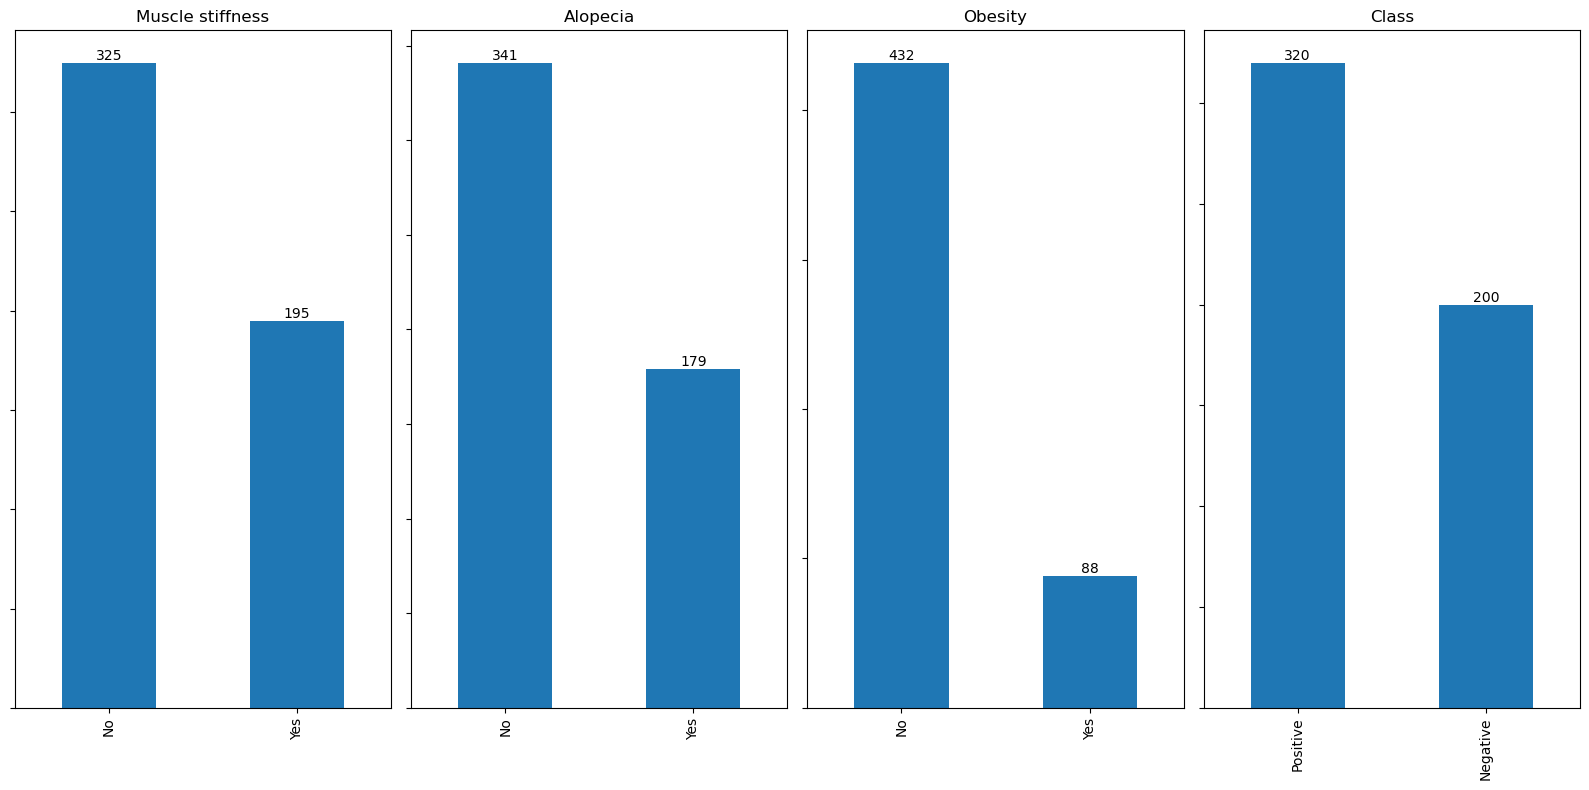

In [13]:
index = 0 
for _ in range(4):
    fig, axes = plt.subplots(ncols = 4, figsize = (16,8))
    for j in range(4):
        count = data[cat[index]].value_counts().plot(kind = 'bar', ax = axes[j])
        for container in axes[j].containers:
            axes[j].bar_label(container)
        axes[j].set_yticklabels(())
        axes[j].set_xlabel("")
        axes[j].set_ylabel("")
        axes[j].set_title(cat[index].capitalize())
        index += 1
    plt.tight_layout()
    plt.show()

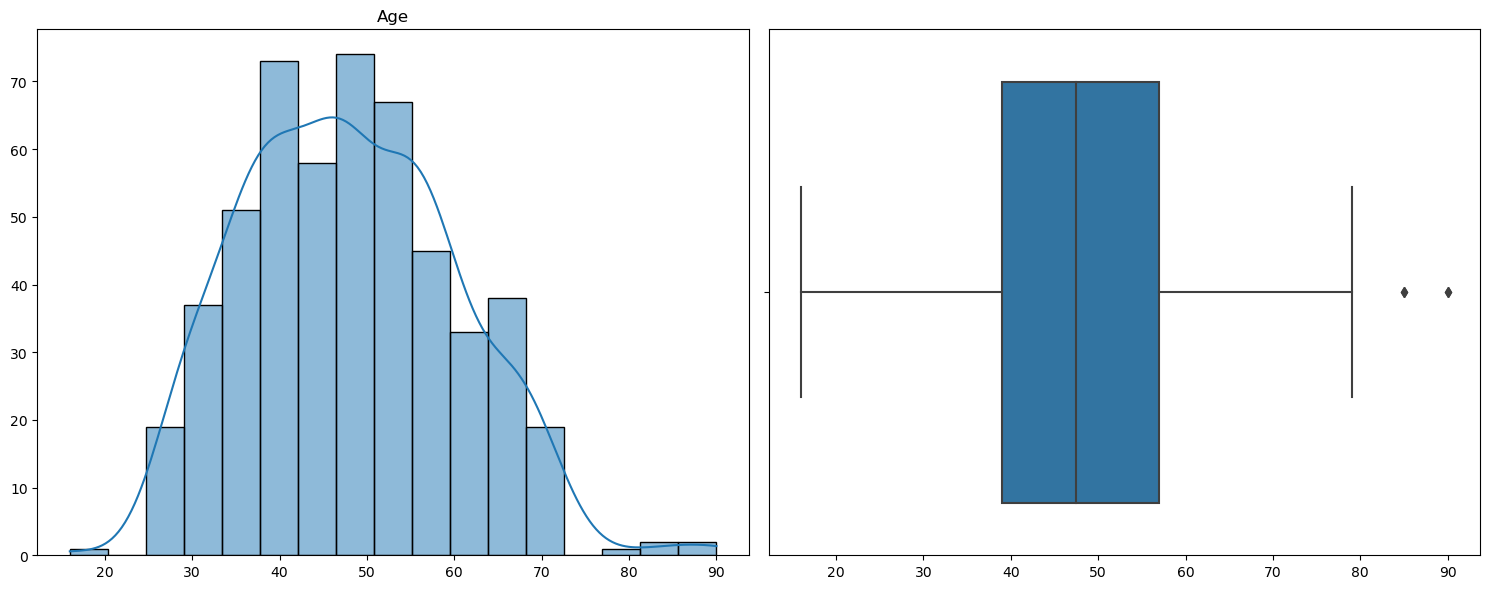

In [14]:
#Patients age records distribtuion and density curve with boxplots showing outliers
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

index = 0

sns.histplot(data, x=numerical, kde=True, ax=axes[index])
axes[index].set_ylabel("")
axes[index].set_xlabel("")
axes[index].set_title("Age")


index += 1

sns.boxplot(data, x=numerical, ax=axes[index])
axes[index].set_ylabel("")
axes[index].set_xlabel("")

plt.tight_layout()
plt.show()

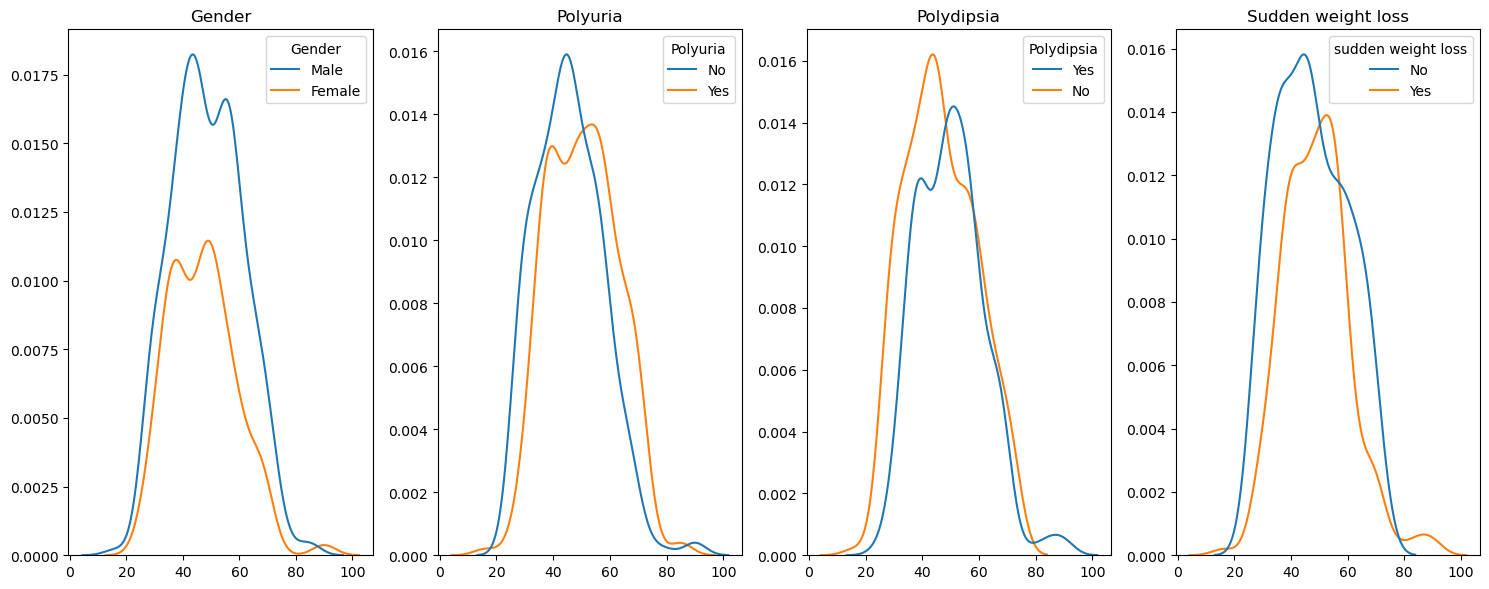

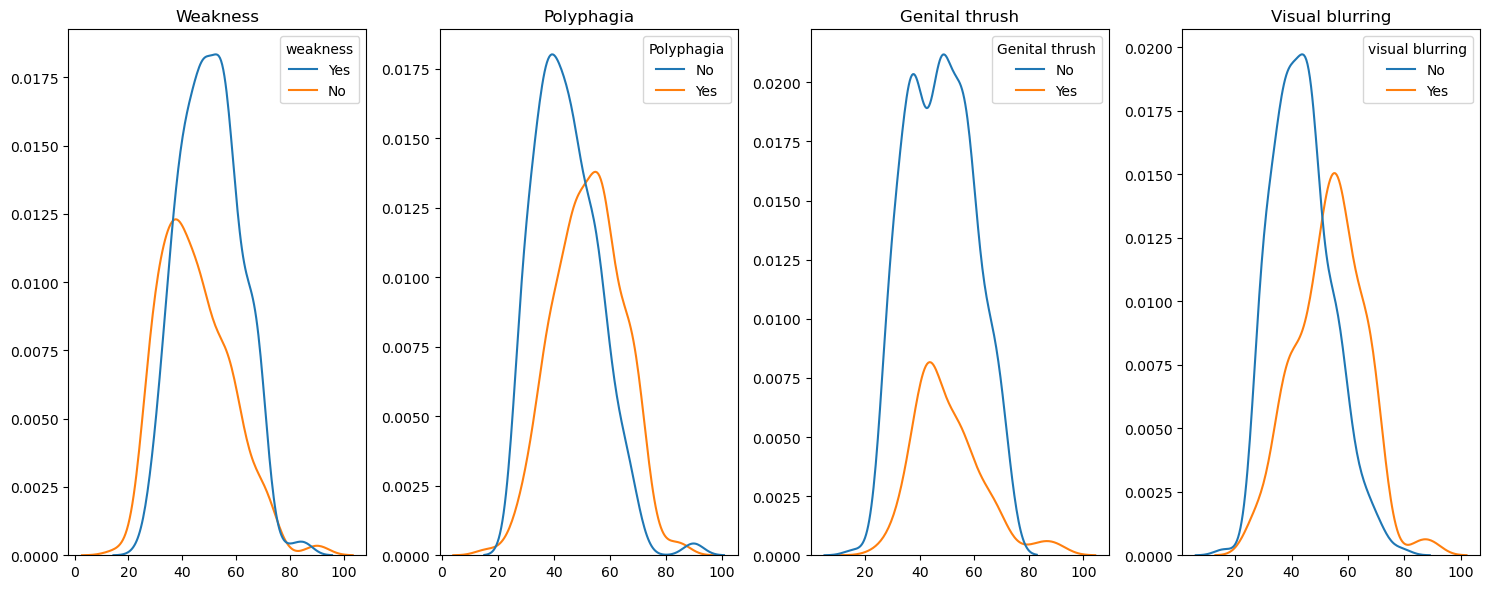

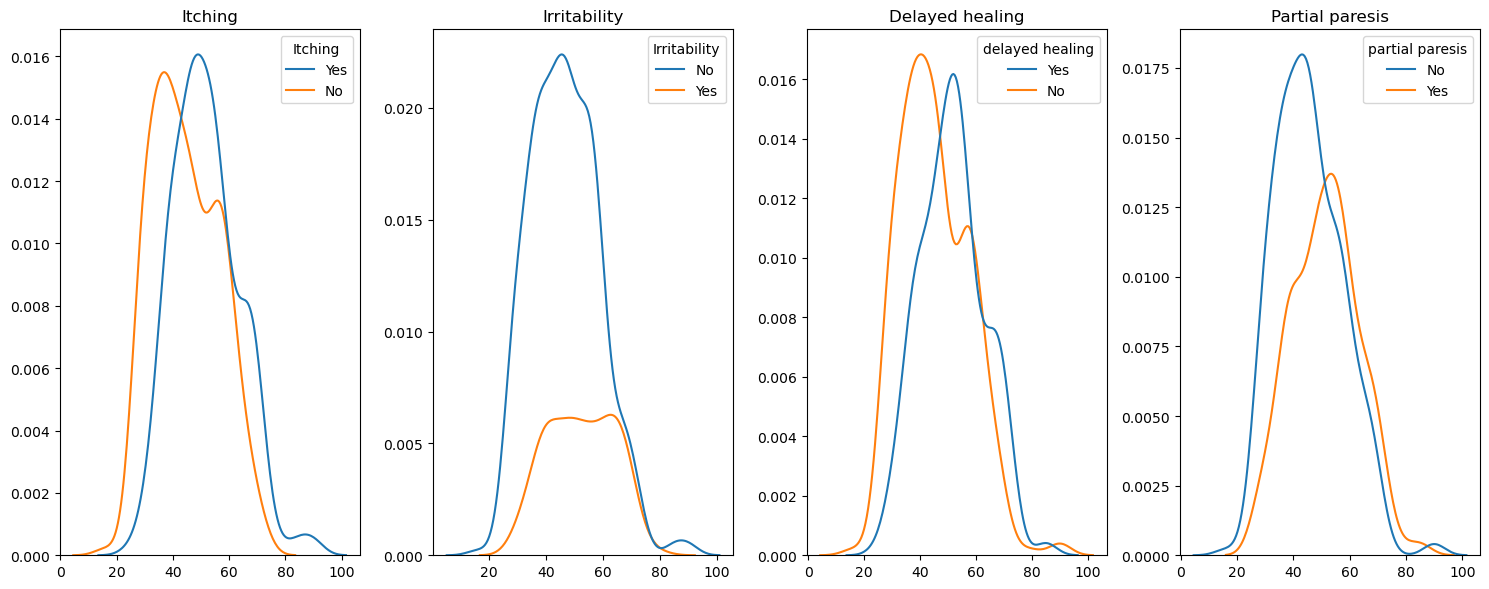

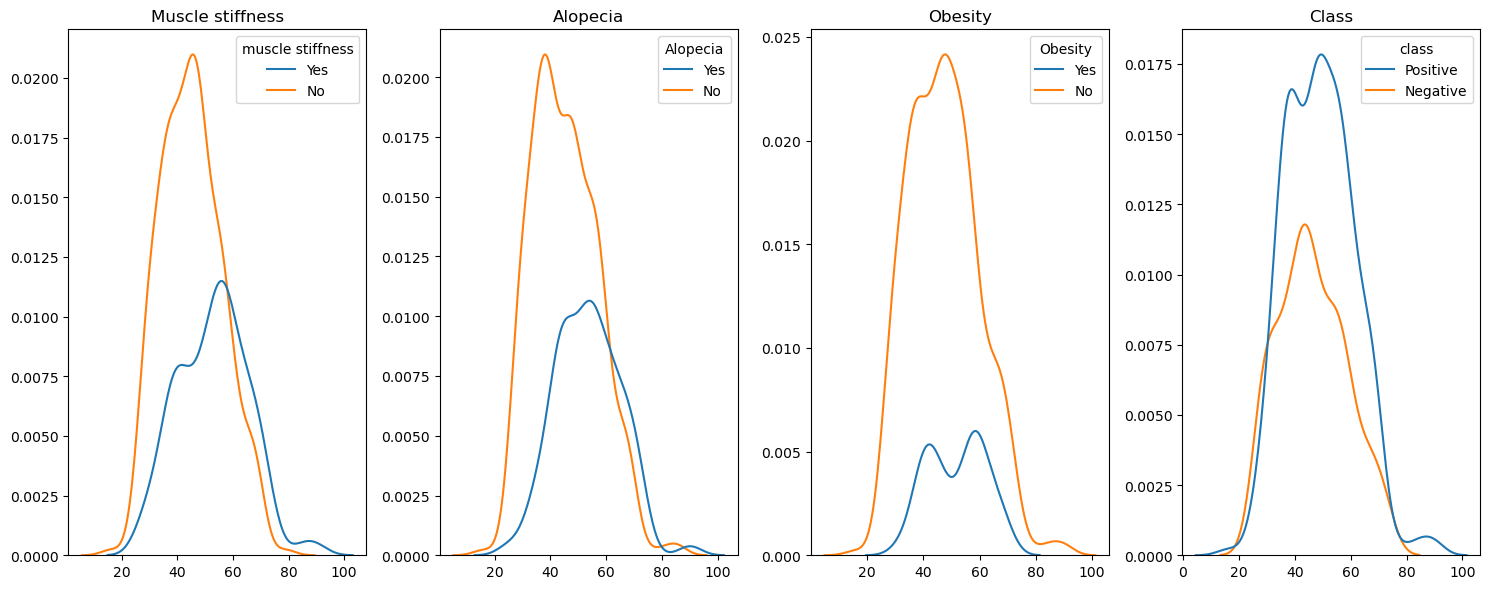

In [15]:
#Age values density curve among each category¶

index = 0

for _ in range(4):
    fig, axes = plt.subplots(ncols = 4, figsize = (15, 6))
    for j in range(4):
        sns.kdeplot(data, x = numerical, hue = cat[index], ax = axes[j])
        axes[j].set_xlabel("")
        axes[j].set_ylabel("")
        axes[j].set_title(cat[index].capitalize())
        index += 1
    plt.tight_layout()
    plt.show()

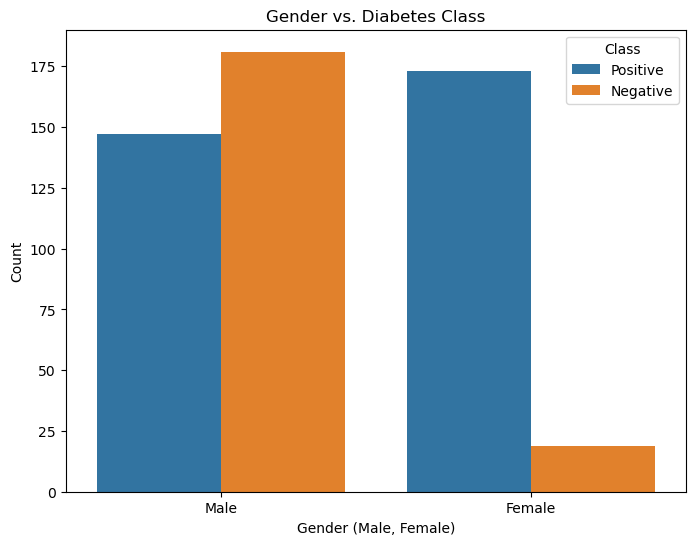

In [16]:
# Create the countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', hue='class')
plt.title('Gender vs. Diabetes Class')
plt.xlabel('Gender (Male, Female)')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

## Data Preprocessing - Encoding categorical features

In [17]:
encoder = LabelEncoder()
for i in cat:
    data[i] = encoder.fit_transform(data[i].values)

In [18]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


## Scaling features

In [19]:
scaler = MinMaxScaler()

x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

x = scaler.fit_transform(x)

## Model Building

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Handling slight class imbalance by applying SMOTE

In [21]:
print("Before: ", Counter(y_train))

smote = SMOTE()

X_train, y_train = smote.fit_resample(X_train, y_train)

print("After: ", Counter(y_train))

Before:  Counter({1: 249, 0: 167})
After:  Counter({1: 249, 0: 249})


In [22]:
def get_dimensions(n):
    mid = n//2
    mp = dict()
    for i in range(1, mid+1):
        if n%i == 0:
            a = n//i
            b = abs(a-i)
            if b not in mp:
                mp[b] = sorted([a, i])
    return mp[min(mp.keys())]

In [23]:
def evaluation(scores: list, reports: dict, cms: dict):
    dd = pd.DataFrame({"score": scores}, index=reports.keys())
    dd = dd.sort_values("score", ascending=False)
    dd["score"] = round(dd["score"], 2)
    fig, axes = plt.subplots()
    dd["score"].plot(kind="bar", ax=axes)
    for container in axes.containers:
        axes.bar_label(container)
    axes.set_yticklabels(())
    axes.set_ylabel("")
    axes.set_xlabel("")
    
    dims = get_dimensions(len(scores))
    
    index = 0
    
    for _ in range(dims[0]):
        fig, axes = plt.subplots(ncols=dims[1], figsize=(15, 6))
        for j in range(dims[1]):
            sns.heatmap(cms[dd.index[index]], annot=True, ax=axes[j])
            axes[j].set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
            index += 1
        plt.tight_layout()
        plt.show()
        
    for i in dd.index:
        print("*"*30)
        print(i)
        print(reports[i])
        print("\n\n")

In [24]:
def training(models, names):
    scores = []
    reports = dict()
    cms = dict()
    
    for i, j in zip(models, names):
        i.fit(X_train, y_train)
        pred = i.predict(X_test)
        scores += [accuracy_score(pred, y_test)*100]
        reports[j] = classification_report(pred, y_test)
        cms[j] = confusion_matrix(pred, y_test)
        
    evaluation(scores, reports, cms)

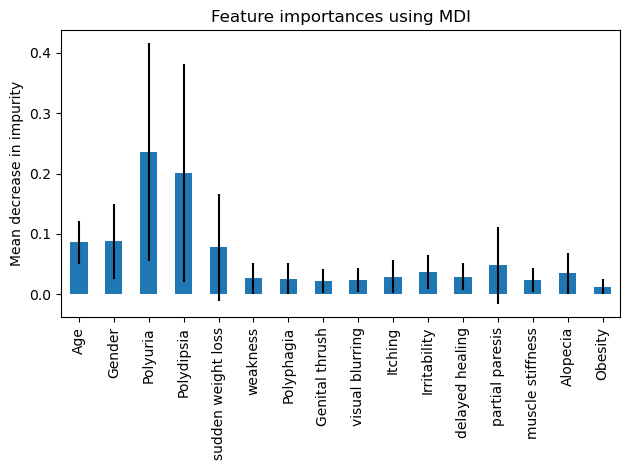

In [25]:
forest = RandomForestClassifier()

forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=data.columns[:-1])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

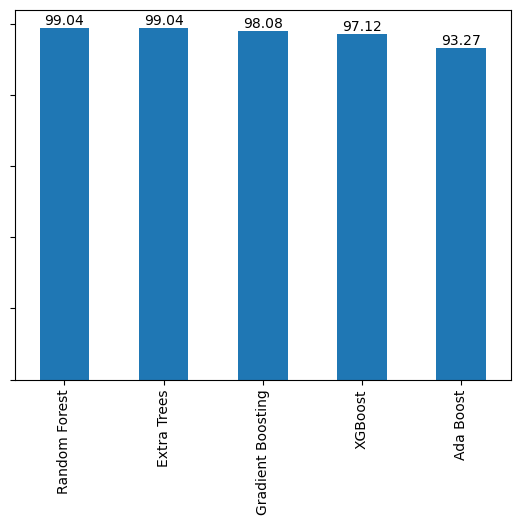

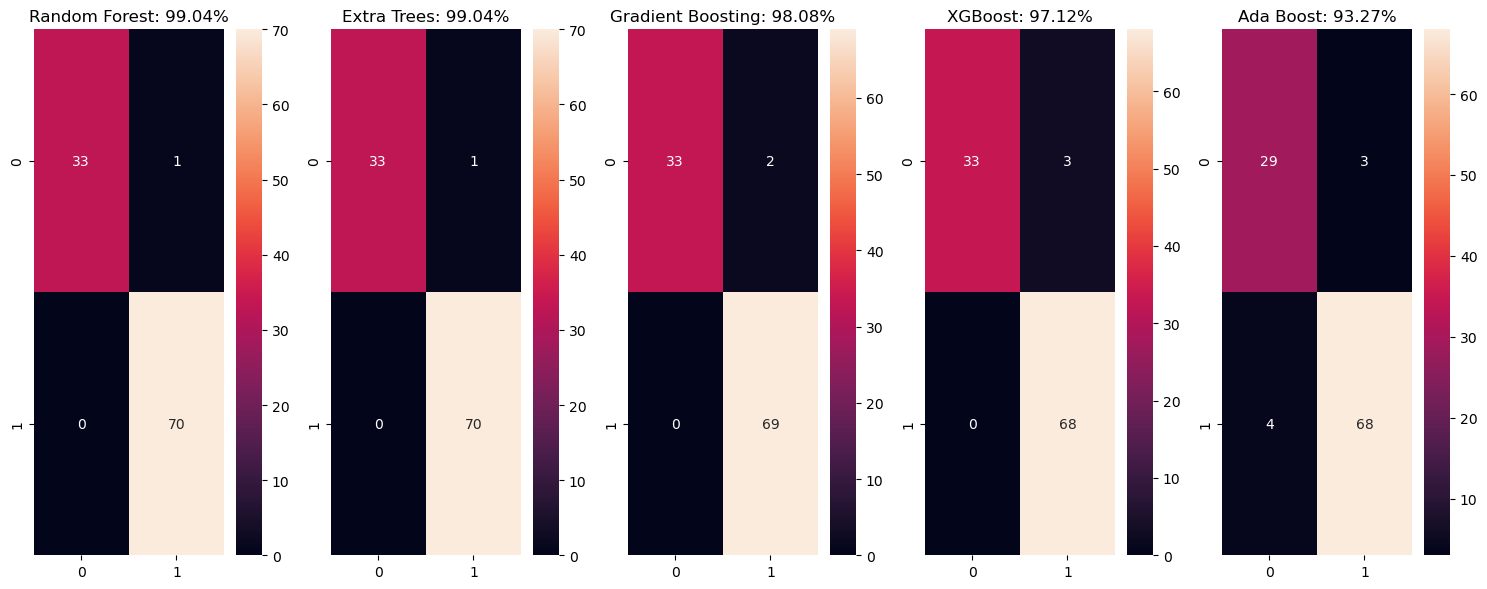

******************************
Random Forest
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.99      1.00      0.99        70

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104




******************************
Extra Trees
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.99      1.00      0.99        70

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104




******************************
Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.97      1.00      0.99        69

    accuracy                           

In [26]:
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier()
xgb = XGBClassifier()

ensemble_models = [rfc, gbc, abc, etc, xgb]

ensemble_names = ["Random Forest", "Gradient Boosting", "Ada Boost", "Extra Trees", "XGBoost"]

training(ensemble_models, ensemble_names)

## Classic ML models performance

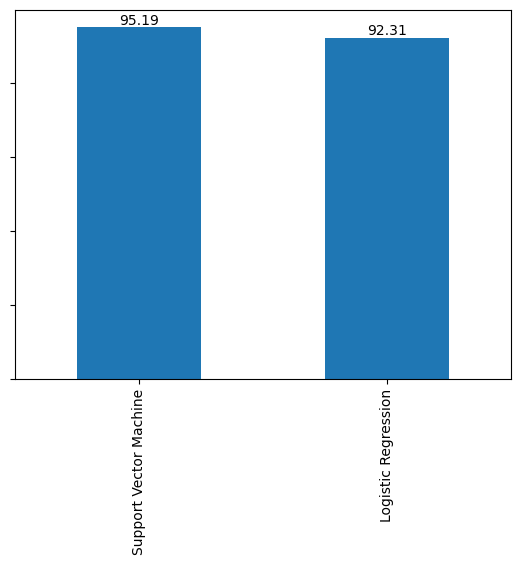

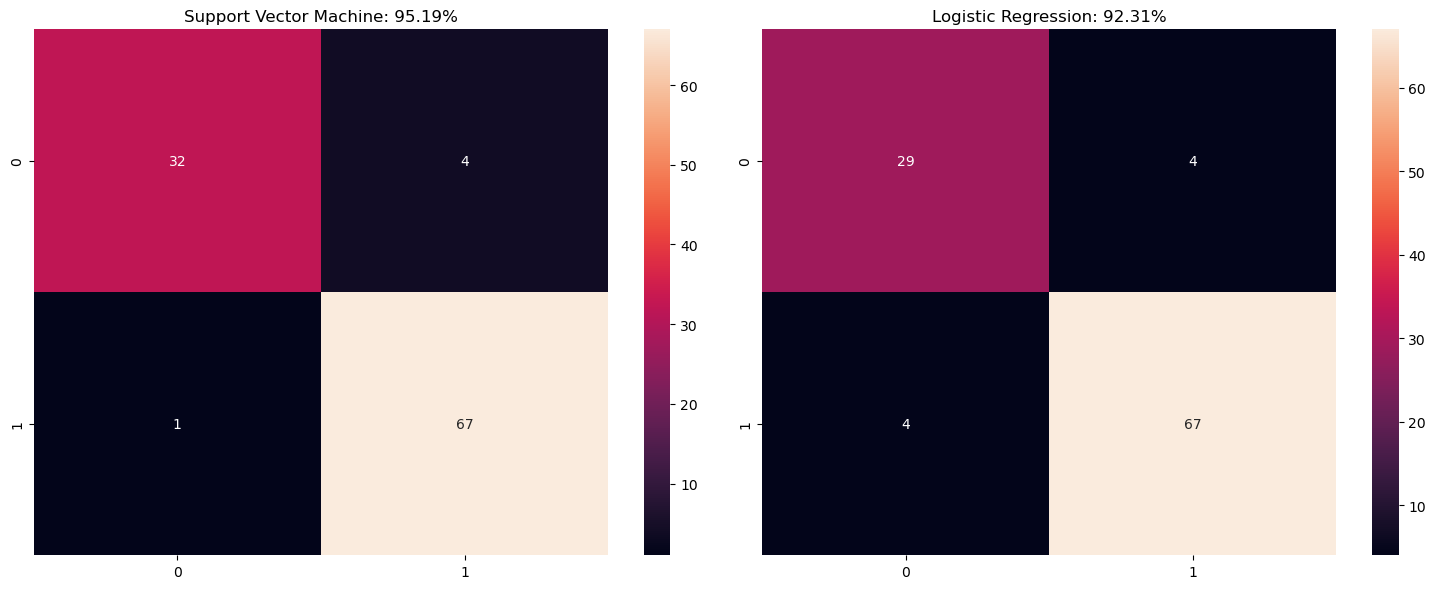

******************************
Support Vector Machine
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.94      0.99      0.96        68

    accuracy                           0.95       104
   macro avg       0.96      0.94      0.95       104
weighted avg       0.95      0.95      0.95       104




******************************
Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.94      0.94      0.94        71

    accuracy                           0.92       104
   macro avg       0.91      0.91      0.91       104
weighted avg       0.92      0.92      0.92       104






In [30]:
svc = SVC()
lgr = LogisticRegression()

classic_models = [svc, lgr]
classic_names = ["Support Vector Machine", "Logistic Regression"]

training(classic_models, classic_names)

## ANN architecture defined and trained

In [36]:
model_input = tf.keras.Input(shape=(X_train.shape[1],))
dense_layer_1 = tf.keras.layers.Dense(32, activation="linear")(model_input)
norm_layer_1 = tf.keras.layers.BatchNormalization()(dense_layer_1)
fc = tf.keras.layers.Dense(2, activation="softmax")(norm_layer_1)
model = tf.keras.Model(inputs=model_input, outputs=fc)

model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])

In [37]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 738 (2.88 KB)

 Trainable params: 674 (2.63 KB)

 Non-trainable params: 64 (256.00 B)

In [39]:
y_cat = tf.keras.utils.to_categorical(y_train)
history = model.fit(X_train, y_cat, batch_size=8, epochs=10, validation_split=0.1)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5901 - loss: 0.7677 - val_accuracy: 0.5600 - val_loss: 0.6907
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8153 - loss: 0.3998 - val_accuracy: 0.8400 - val_loss: 0.4654
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8697 - loss: 0.3112 - val_accuracy: 0.9800 - val_loss: 0.3070
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8764 - loss: 0.3254 - val_accuracy: 0.9800 - val_loss: 0.2348
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8944 - loss: 0.2664 - val_accuracy: 0.9800 - val_loss: 0.1844
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.3342 - val_accuracy: 0.9800 - val_loss: 0.1605
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8938 - loss: 0.2627 - val_accuracy: 0.9800 - val_loss: 0.1483
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8685 - loss: 0.2816 - val_accuracy: 0.9800 - val_loss

## Training performance log

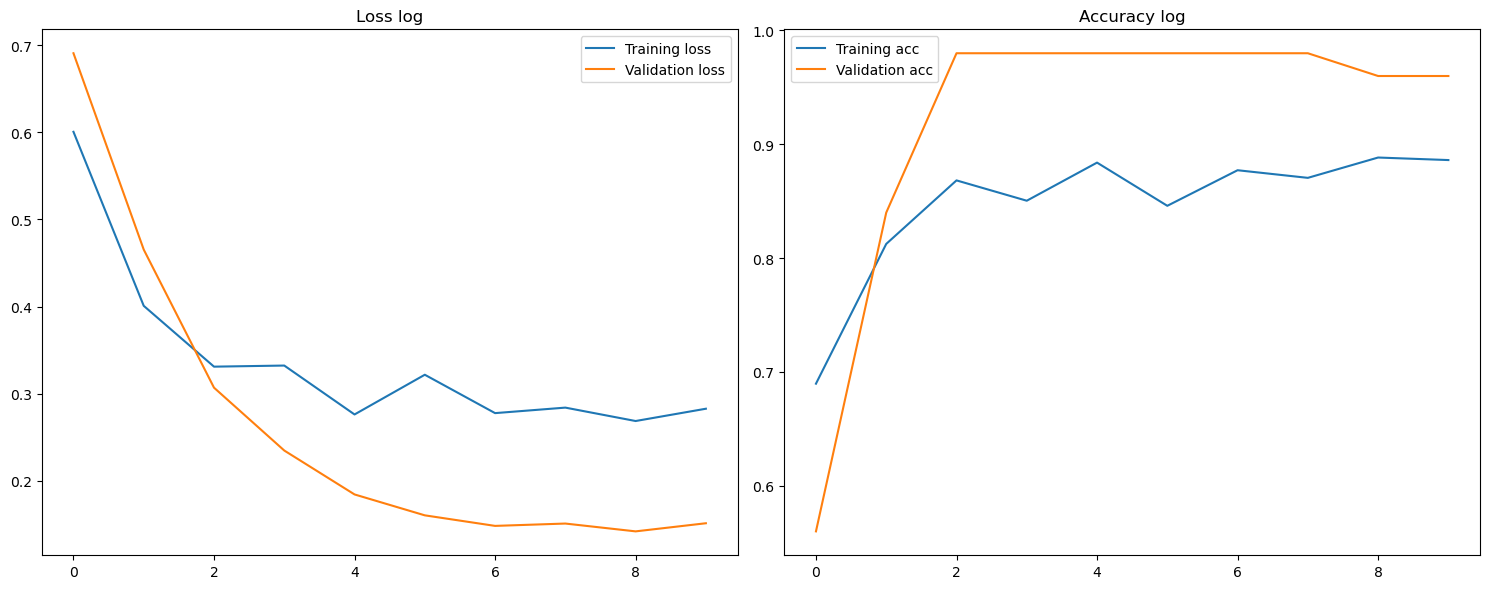

In [40]:

fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

index = 0

axes[index].plot(history.history["loss"], label="Training loss")
axes[index].plot(history.history["val_loss"], label="Validation loss")
axes[index].legend()
axes[index].set_title("Loss log")

index += 1

axes[index].plot(history.history["accuracy"], label="Training acc")
axes[index].plot(history.history["val_accuracy"], label="Validation acc")
axes[index].legend()
axes[index].set_title("Accuracy log")

plt.tight_layout()
plt.show()

## Testing ANN model

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


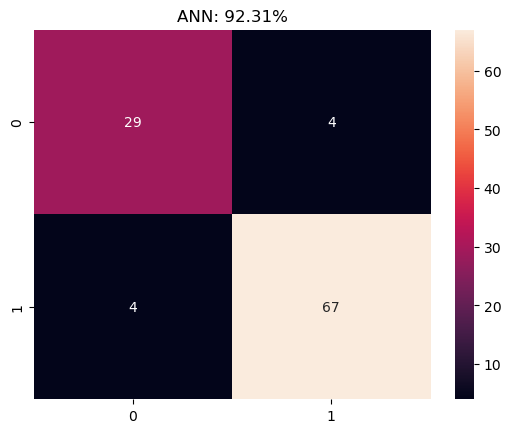

ANN performance evaluation
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.94      0.94      0.94        71

    accuracy                           0.92       104
   macro avg       0.91      0.91      0.91       104
weighted avg       0.92      0.92      0.92       104



In [41]:
probas = model.predict(X_test)
pred = [np.argmax(i) for i in probas]
score = accuracy_score(pred, y_test)*100
report = classification_report(pred, y_test)
cm = confusion_matrix(pred, y_test)

sns.heatmap(cm, annot=True)
plt.title("{}: {}%".format("ANN", round(score, 2)))

plt.show()

print("ANN performance evaluation")
print(report)